In [9]:
import pandas as pd
%pylab inline
capop = pd.read_csv("canadatowns.txt", sep=" ", header=None, 
           names=["rank","name","size","pop16","pop11","growth"])
capop["pop"] = capop["pop16"].str.replace(",","").astype(int)

Populating the interactive namespace from numpy and matplotlib


In [2]:
capop 

,rank,name,size,pop16,pop11,growth,pop
0,81,Baie-Saint-Paul,Small,"4,868","4,323",+12.6%,4868
1,82,Berthierville,Small,"4,715","4,495",+4.9%,4715
2,83,Maniwaki,Small,"4,708","4,192",-2.3%,4708
3,83,Napierville,Small,"4,708","4,192",+12.3%,4708
4,84,LaSarre,Small,"4,570","4,876",-6.3%,4570
5,85,Amqui,Small,"4,511","4,657",-3.1%,4511
6,86,Lac-Alouette,Small,"4,473","3,970",+12.7%,4473
7,87,Verchères,Small,"4,429","4,256",+4.1%,4429
8,88,Princeville,Small,"4,384","3,935",+11.4%,4384
9,89,Terrasse-des-Pins,Small,"4,268","3,880",+10.0%,4268


In [3]:
import numpy as np
lonslats = {}
for cc in capop.name.values:
    lonslats[cc] = np.array([np.nan, np.nan])

In [6]:
import geopandas as gpd
import shapely
from fiona.crs import from_epsg
latlonsDF = pd.read_csv("canadatowns.csv")
# Create Point Geometry for based on lonlat column
lonlatGDF = gpd.GeoDataFrame(latlonsDF) 
lonlatGDF['lonlat'] = list(zip(lonlatGDF["1"].values, lonlatGDF["0"].values))
lonlatGDF['geometry'] = lonlatGDF[['lonlat']].\
                applymap(lambda x: shapely.geometry.Point(list((x[1], x[0]))))
lonlatGDF.crs = from_epsg(4326) 

In [7]:
latlonsDF

,Unnamed: 0,0,1,lonlat
0,Baie-Saint-Paul,-70.504084,47.442406,"(47.442405900000004, -70.50408399999998)"
1,Berthierville,-73.184759,46.083474,"(46.083474, -73.1847588)"
2,Maniwaki,-75.964752,46.377517,"(46.3775167, -75.96475190000001)"
3,Napierville,-73.405115,45.186486,"(45.1864857, -73.40511459999998)"
4,LaSarre,-79.202857,48.805266,"(48.805265999999996, -79.20285720000001)"
5,Amqui,-67.431191,48.464605,"(48.464605299999995, -67.4311915)"
6,Lac-Alouette,-73.958810,45.817006,"(45.817006, -73.95881000000001)"
7,Verchères,-73.352747,45.773338,"(45.773338, -73.3527469)"
8,Princeville,-71.875577,46.166991,"(46.1669906, -71.87557729999999)"
9,Terrasse-des-Pins,-71.328306,46.750234,"(46.7502342, -71.3283057)"


{'proj': 'aea', 'lat_1': 50, 'lat_2': 70, 'lat_0': 40, 'lon_0': -96, 'x_0': 0, 'y_0': 0, 'datum': 'NAD83', 'units': 'm', 'no_defs': True}
{'init': 'epsg:4269', 'no_defs': True}


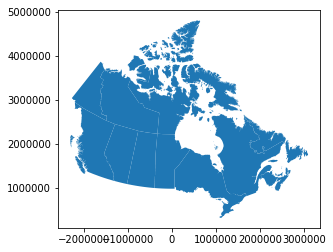

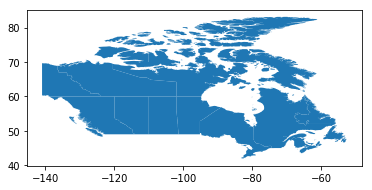

In [16]:
canada = gpd.GeoDataFrame.from_file("Canada.shp")
#canada.crs = from_epsg(3347)
canada.plot()
print(canada.crs)

canada = canada.to_crs(epsg=4269)
canada.plot()
#world.crs
print(canada.crs)


Populating the interactive namespace from numpy and matplotlib


(-90.0, -50.0, 39.85356845855715, 85.16807231903043)

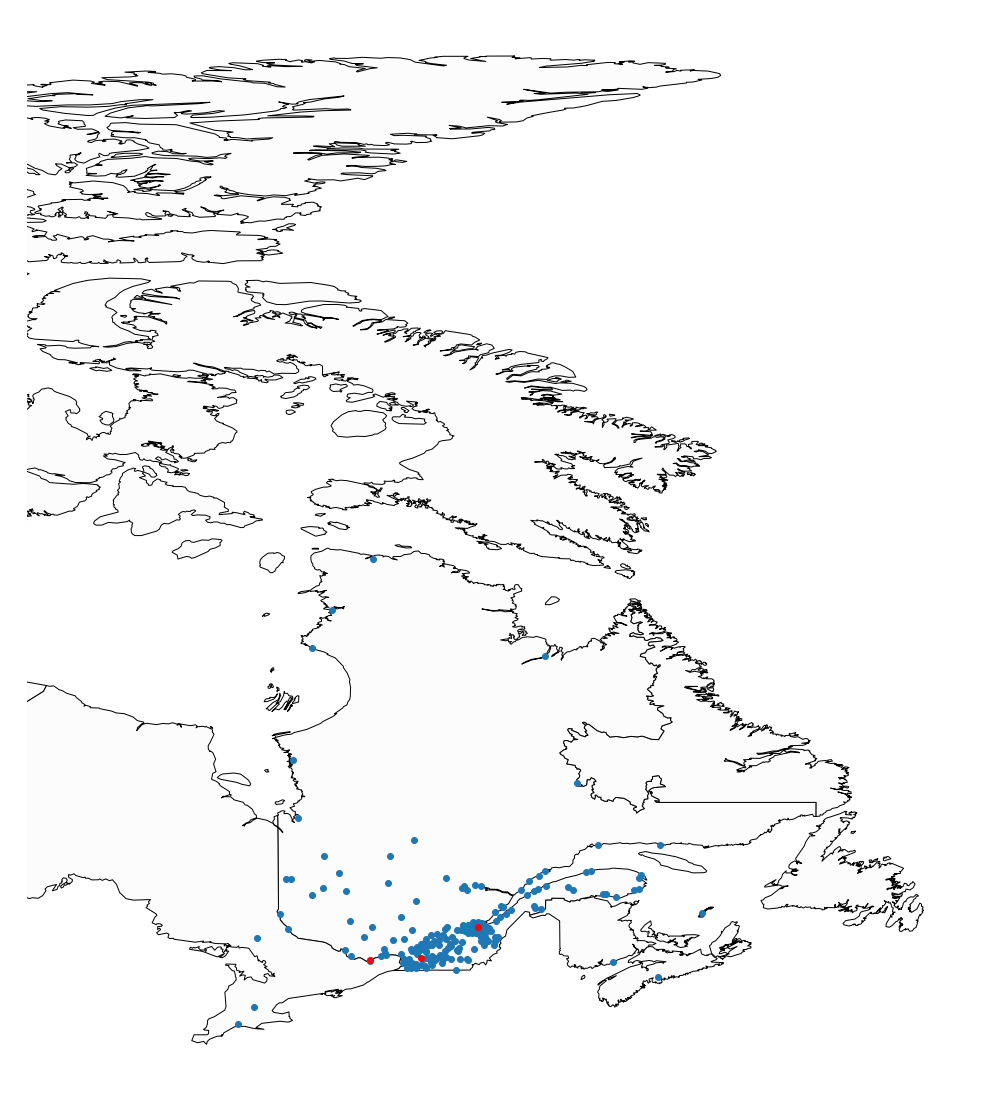

In [21]:
#countriesshp.merge(dfgroup, right_index=True, left_on="NAME").plot(cmap="Blues",
#                   column="count", ax=ax)\begin{equation}\label{eq:}


%pylab inline
ax = canada.plot(color="#fcfcfc", edgecolor="k", figsize=(20,20))
ax = lonlatGDF.plot(ax=ax)
ml = gpd.GeoDataFrame(pd.DataFrame({1:[45.5017, 46.8139, 45.4215], 
                                    0:[-73.5673, -71.2080, -75.6972]}))
ml['lonlat'] = list(zip(ml[1].values, ml[0].values))
ml['geometry'] = ml[['lonlat']].\
                applymap(lambda x: shapely.geometry.Point(list((x[1], x[0]))))
ml.crs = from_epsg(4326) 
ml = ml.to_crs(epsg=4269)
ml.plot(color='r', ax=ax)
ax.set_xlim(-90, -50)
ax.axis('off')

In [40]:
import folium
from folium import plugins
m = folium.Map(location=[46.8139, -71.2080])

for ll in zip(latlonsDF[["Unnamed: 0","lonlat"]].values):
    if np.isnan(ll[0][1][0]): continue
    folium.Marker(
    location=[ll[0][1][0], ll[0][1][1]], # coordinates for the marker (Earth Lab at CU Boulder)
    popup=ll[0][0], # pop-up label for the marker
    icon=folium.Icon()
).add_to(m)


# Display the map
m


In [24]:
!pip install folium

    100% |████████████████████████████████| 92kB 1.1MB/s ta 0:00:01
